# **Trabalho Prático: Introdução à Ciência dos Dados**
### **Entrega 4 - Análise Preditiva**
**Integrantes**: Aryel Penido - 3500 Claudio Barbosa - 3492 Isabela Ramos - 3474

**Tema:** Análise da população em situação de rua em BH

**Dados:** https://dados.pbh.gov.br/dataset/populacao-de-rua




##Introdução



Colocar em prática o que é aprendido em sala de aula é um dos grandes desafios. Em uma matéria de Ciência dos Dados, o envolvimento com situações reais é a melhor maneira de aprendizado pela prática.

Objetivando tratar de um assunto de extrema relevância, este trabalho abordará uma análsie de dados sobre a população em situação de rua em Belo Horizonte. 
Com isso, espera-se que todos os passos de boa análise sejam realizados da melhor maneira possível, este relatório foi escrito como um passo-a-passo de todo o processo que culmina em uma apresentação em vídeo que expõe as descobertas e considerações do grupo.

Divididos por tópicos referentes a cada etapa de entrega, serão detalhadas as decisões e observações feitas em cada fase. Sendo elas:

1.   Escolha dos dados e planejamento;
2.   Preparação dos dados;
3.   Análise exploratoria e extração de conhecimento;
4.   Análise Preditiva.



##**1. Escolha de dados e planejamento**

Como dito, o grupo escolheu como objeto de estudo a população de rua na cidade de Belo Horizonte. Inicialmente esperava-se realizar uma análise a nível federal, abordando e estudando os dados de todos os estados e do Distrito Federal.

Contudo, a acessibilidade a dados seguros que estejam disponibilizados de maneira acessível foi a maior barreira encontrada. O grupo então optou por tratar somente do munícipio de Belo Horizonte, uma vez que os dados estavam sendo atualizados mensalmente e encontravam-se disponibilizados de maneira organizada, possuindo até um dicionário. Os dados estão disponíveis em : https://dados.pbh.gov.br/dataset/populacao-de-rua a partir do dia 13 de agosto de 2021.

Infelizmente tal dicionário não correspondia com a realidade dos dados, e foi necessário descartar alguns tipos de dados, realizar a retirada de dados nulos que poderiam interferir em nossas análises, indicando nesse relatório sempre que algum outro tratamento fora necessário.

Como abordagem para planejar as ações, algumas perguntas foram levantadas para servirem como bussóla da pesquisa. Algumas não foram respondidas devido a qualidade e quantidade dos dados. Vale ressaltar que uma análise temporal seria muito difícil pois estamos em um período complexo político/econômico/social que afetam o foco de nosso estudo. 

###Perguntas formuladas



1. Qual a distribuição geral de idade dos moradores de rua em Belo Horizonte?
2. Qual a relação entre o contato com parentes e o tempo que estão em situação de rua?
3. Qual a distribuição de idade de homens moradores de rua em Belo Horizonte?
4. Qual a distribuição de idade de mulheres moradoras de rua em Belo Horizonte?
5. Qual o percentual, entre os moradores de rua, cadastrados em um Cras?
6. Análise temporal da cobertura do CRAS desde o início da pesquisa?(09/2020 a 07/2021)
7. Quais regiões os critérios para que uma implantação de unidade do CRAS seja necessária?
8. Qual o percentual de moradores de rua em cada regional de Belo Horizonte?
9. Qual o percentual de moradores de rua que possuem contato com parentes fora das ruas?
10. É possível vincular áreas com mais pessoas em situação de rua com uma maior criminalidade?
11. Houve crescimento da população em situação de rua durante o período da pandemia?
12. Quais os impactos da pandemia na remuneração dessa população
13. Qual a cobertura do Bolsa Família nas pessoas em situação de rua?
14. Qual a relação das associações entre idade, escolaridade, valor de remuneração do trabalho principal, o sexo e idade da população em
situação de rua?
15. Quais as características que podem definir desta população em um processo de classificação?
16. Aproximadamente quantas moradias seriam necessárias para abrigar essa população?
17. Quais políticas públicas devem ser aprimoradas para atender essa população?* (apresentação)
18. Qual a média de tempo em que os moradores vivem na rua?
19. Há relação entre a faixa de renda familiar e o sexo ou idade da população de rua?
20. Quais são a raça e o sexo predominante de cada regional presente no banco de dados?
21. Qual é o grau de instrução da população de rua?



#**2. Preparação dos dados**

Iniciamos o trabalho com 11 tabelas, cada uma de um mês iniciando em setembro de 2020 e terminando em julho de 2021, e escolhemos juntar todas elas em um unico Dataframe. Algo que precisa ser considerado nessa abordagem é o fato de que existe a possibilidade da mesma pessoa aparecer em meses diferentes sendo "contada" duas vezes.



##Coleta de dados

In [ ]:
##imports 
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:


#URLs dos arquivos (direto da base de dados)
url_9_20 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/aa8477c0-81fc-442c-b1bf-25475674adda/download/4-data_set_poprua_cadunico_09-2020.csv'
url_10_20 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/d498812a-0d81-46de-93d1-9c7cd84b85b8/download/data_set_poprua_cadunico-10-2020.csv'
url_11_20 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/952c9ff9-a7e6-4800-9ee7-fe7231d92a2c/download/data_set_poprua_cadunico-11-2020.csv'
url_12_20 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/153bf11e-5416-433b-bca4-790baa1e8f44/download/data_set_poprua_cadunico.csv'
url_1_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/076df2cf-7f98-462d-a544-a10bc675974b/download/data_set_poprua_cadunico.csv'
url_2_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/dd2a60bb-3600-4248-815e-69863417f91f/download/data_set_poprua_cadunico.csv'
url_3_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/319191cc-20a5-4e7b-8b13-59cd433902dc/download/data_set_poprua_cadunico.csv'
url_4_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/360b17f7-5262-4a4e-ad3d-6097b756871b/download/data_set_poprua_cadunico.csv'
url_5_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/9096f15c-d400-481f-a078-5238c83ca0e7/download/data_set_poprua_cadunico.csv'
url_6_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/44baba43-85ba-4838-8c6e-6adcb469e03b/download/data_set_poprua_cadunico_06-2021.csv'
url_7_21 = 'https://ckan.pbh.gov.br/dataset/1f868d62-d7c3-4121-8ffa-9ed66d71d3e2/resource/f904a3a6-1f6e-42b6-b326-7ab0bfe8eca6/download/data_set_poprua_cadunico_07-2021.csv'

#Leitura individual de cada um
data9_20 = pd.read_csv(url_9_20,sep = ";")
data10_20 = pd.read_csv(url_10_20,sep = ";")
data11_20 = pd.read_csv(url_11_20,sep = ";")
data12_20 = pd.read_csv(url_12_20,sep = ";")
data1_21 = pd.read_csv(url_1_21,sep = ";")
data2_21 = pd.read_csv(url_2_21,sep = ";")
data3_21 = pd.read_csv(url_3_21,sep = ";")
data4_21 = pd.read_csv(url_4_21,sep = ";")
data5_21 = pd.read_csv(url_5_21,sep = ";")
data6_21 = pd.read_csv(url_6_21,sep = ";")
data7_21 = pd.read_csv(url_7_21,sep = ";")

##Agrupando todos os dados em um único Dataframe

In [ ]:
df2020=pd.concat([data9_20,data10_20, data11_20, data12_20],ignore_index=True)
df2021=pd.concat([data1_21, data2_21, data3_21, data4_21, data5_21, data6_21, data7_21],ignore_index=True)

##Agrupando os dados por ano

In [ ]:
df=pd.concat([data9_20,data10_20, data11_20, data12_20, data1_21, data2_21, data3_21, data4_21, data5_21, data6_21, data7_21],ignore_index=True)
df

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,Faixa da renda familiar per capita,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,62.0,FEMININO,SIM,SIM,Fundamental incompleto,Preta,Ate R$89.00,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
1,Ate seis meses,Quase nunca,04/06/1986,34.0,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,01/09/2020
2,Entre cinco e dez anos,Nunca,03/10/1963,56.0,FEMININO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,01/09/2020
3,Ate seis meses,Todo dia,03/04/1958,62.0,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
4,Entre cinco e dez anos,Todo ano,11/08/1960,60.0,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95178,Ate seis meses,Quase nunca,28/08/1961,59.0,MASCULINO,SIM,SIM,Sem instrucao,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,01/07/2021
95179,Entre um e dois anos,Todo mes,08/08/1981,39.0,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,LESTE,ate 12 Meses,01/07/2021
95180,Ate seis meses,Quase nunca,24/09/1973,47.0,MASCULINO,SIM,SIM,Fundamental incompleto,Nao Informado,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,VENDA NOVA,ate 12 Meses,01/07/2021
95181,Entre cinco e dez anos,Quase nunca,23/11/1961,59.0,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,01/07/2021


##Tratamento de dados

In [ ]:
df.drop(["Faixa da renda familiar per capita"], axis='columns', inplace=True)
df.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,62.0,FEMININO,SIM,SIM,Fundamental incompleto,Preta,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
1,Ate seis meses,Quase nunca,04/06/1986,34.0,MASCULINO,NAO,SIM,Medio incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,01/09/2020
2,Entre cinco e dez anos,Nunca,03/10/1963,56.0,FEMININO,SIM,SIM,Fundamental incompleto,Parda,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,01/09/2020
3,Ate seis meses,Todo dia,03/04/1958,62.0,FEMININO,NAO,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,01/09/2020
4,Entre cinco e dez anos,Todo ano,11/08/1960,60.0,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,01/09/2020


**Verificar campos vazios/nulos:**

In [ ]:
df.isnull().sum()

TEMPO_VIVE_NA_RUA                    0
CONTATO_PARENTE_FORA_RUAS            0
DATA_NASCIMENTO                      0
IDADE                             8282
SEXO                                 0
BOLSA_FAMILIA                        0
POP_RUA                              0
GRAU_INSTRUCAO                       0
COR_RACA                             0
VAL_REMUNERACAO_MES_PASSADO        495
CRAS                                 0
REGIONAL                             0
FAIXA_DESATUALICACAO_CADASTRAL       0
MES_ANO_REFERENCIA                   0
dtype: int64

* É possível observar que apesar de todos os campos de data de nascimento estarem devidamente preenchidos, alguns dos campos de idade não estão.

**Verificar os tipos dos dados:**

In [ ]:
df.dtypes

TEMPO_VIVE_NA_RUA                  object
CONTATO_PARENTE_FORA_RUAS          object
DATA_NASCIMENTO                    object
IDADE                             float64
SEXO                               object
BOLSA_FAMILIA                      object
POP_RUA                            object
GRAU_INSTRUCAO                     object
COR_RACA                           object
VAL_REMUNERACAO_MES_PASSADO       float64
CRAS                               object
REGIONAL                           object
FAIXA_DESATUALICACAO_CADASTRAL     object
MES_ANO_REFERENCIA                 object
dtype: object

* Alguns detalhes importantes: A data_nascimento não está no formato date e os campos idade e val_remuneracao_mes_passado estão no formato float.

* Um dicionário com os tipos de cada atributo é fornecido juntamente ao banco de dados, contudo ele mostrou-se não confiável.

**Vamos utilizar a data de nascimento para calcular a idade:**

* Convertendo MES_ANO_REFERENCIA de objetct para datetime

In [ ]:
df['MES_ANO_REFERENCIA'] = pd.to_datetime(df['MES_ANO_REFERENCIA'])
df.dtypes


TEMPO_VIVE_NA_RUA                         object
CONTATO_PARENTE_FORA_RUAS                 object
DATA_NASCIMENTO                           object
IDADE                                    float64
SEXO                                      object
BOLSA_FAMILIA                             object
POP_RUA                                   object
GRAU_INSTRUCAO                            object
COR_RACA                                  object
VAL_REMUNERACAO_MES_PASSADO              float64
CRAS                                      object
REGIONAL                                  object
FAIXA_DESATUALICACAO_CADASTRAL            object
MES_ANO_REFERENCIA                datetime64[ns]
dtype: object

* Escolhemos calcular as idades das linhas que cujo valor é nulo já que todos tem o atributo DATA_NASCIMENTO preenchido


In [ ]:
##função para calcular idade
def age(born):
    born =datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [ ]:
df['IDADE'] = df['DATA_NASCIMENTO'].apply(age)
df.isnull().sum()

TEMPO_VIVE_NA_RUA                   0
CONTATO_PARENTE_FORA_RUAS           0
DATA_NASCIMENTO                     0
IDADE                               0
SEXO                                0
BOLSA_FAMILIA                       0
POP_RUA                             0
GRAU_INSTRUCAO                      0
COR_RACA                            0
VAL_REMUNERACAO_MES_PASSADO       495
CRAS                                0
REGIONAL                            0
FAIXA_DESATUALICACAO_CADASTRAL      0
MES_ANO_REFERENCIA                  0
dtype: int64

* as linhas com valores nulos de VAL_REMUNERACAO_MES_PASSADO serão retiradas visto que preencher com -1 ou algum texto marcados poderia alterar médias futuras e não temos informações suficientes para afirmar que todos os valores nulos dessa coluna podem ser substituidos por 0

In [ ]:
df = df.dropna(subset=['VAL_REMUNERACAO_MES_PASSADO'])
data = df
df

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,TEMPO_DE_RUA
0,Entre um e dois anos,Todo mes,07/06/1958,63,FEMININO,SIM,SIM,Fundamental incompleto,Preta,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09,2
1,Ate seis meses,Quase nunca,04/06/1986,35,MASCULINO,NAO,SIM,Medio incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,2020-01-09,0
2,Entre cinco e dez anos,Nunca,03/10/1963,58,FEMININO,SIM,SIM,Fundamental incompleto,Parda,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,2020-01-09,4
3,Ate seis meses,Todo dia,03/04/1958,63,FEMININO,NAO,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09,0
4,Entre cinco e dez anos,Todo ano,11/08/1960,61,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,2020-01-09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95178,Ate seis meses,Quase nunca,28/08/1961,60,MASCULINO,SIM,SIM,Sem instrucao,Parda,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,2021-01-07,0
95179,Entre um e dois anos,Todo mes,08/08/1981,40,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA AREA CRAS,LESTE,ate 12 Meses,2021-01-07,2
95180,Ate seis meses,Quase nunca,24/09/1973,48,MASCULINO,SIM,SIM,Fundamental incompleto,Nao Informado,0.0,ENDERECO FORA AREA CRAS,VENDA NOVA,ate 12 Meses,2021-01-07,0
95181,Entre cinco e dez anos,Quase nunca,23/11/1961,59,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,ate 12 Meses,2021-01-07,4


#**3. Análise exploratória dos dados**

Cabeçalho do Dataframe:

In [ ]:
df.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,63,FEMININO,SIM,SIM,Fundamental incompleto,Preta,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09
1,Ate seis meses,Quase nunca,04/06/1986,35,MASCULINO,NAO,SIM,Medio incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,2020-01-09
2,Entre cinco e dez anos,Nunca,03/10/1963,58,FEMININO,SIM,SIM,Fundamental incompleto,Parda,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,2020-01-09
3,Ate seis meses,Todo dia,03/04/1958,63,FEMININO,NAO,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09
4,Entre cinco e dez anos,Todo ano,11/08/1960,61,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,2020-01-09


**Tipos de dados:**

In [ ]:
df.dtypes

TEMPO_VIVE_NA_RUA                         object
CONTATO_PARENTE_FORA_RUAS                 object
DATA_NASCIMENTO                           object
IDADE                                      int64
SEXO                                      object
BOLSA_FAMILIA                             object
POP_RUA                                   object
GRAU_INSTRUCAO                            object
COR_RACA                                  object
VAL_REMUNERACAO_MES_PASSADO              float64
CRAS                                      object
REGIONAL                                  object
FAIXA_DESATUALICACAO_CADASTRAL            object
MES_ANO_REFERENCIA                datetime64[ns]
dtype: object

##IDADE
### Qual a distribuição geral de idade dos moradores de rua em Belo Horizonte?

Observou-se que a maioria dos moradores tem entre 34 e 51 anos.

In [ ]:
df['IDADE'].describe()

count    94688.000000
mean        42.977674
std         11.563876
min         15.000000
25%         35.000000
50%         42.000000
75%         51.000000
max         84.000000
Name: IDADE, dtype: float64

**Gráfico por incidência:**

Observa-se que a idade de 40 anos é a que possui mais representantes.

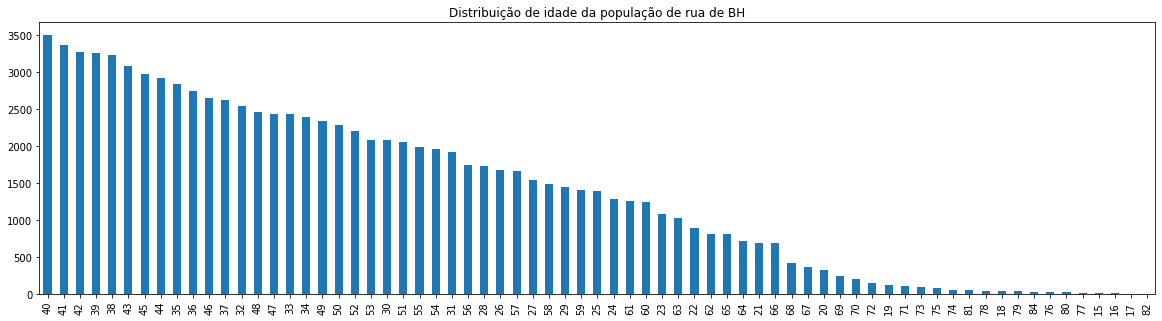

In [ ]:
fig = plt.figure(figsize=(20,5))
fig = df['IDADE'].value_counts().plot.bar()
fig.set_title('Distribuição de idade da população de rua de BH')
plt.show()

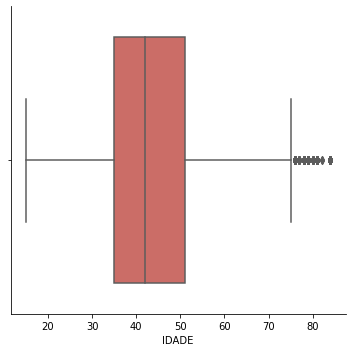

In [ ]:
sns.catplot(x="IDADE", kind="box", palette="hls" ,data=df)

##SEXO
### Qual é a distribuição do sexo da população de rua de BH?

Quase 90% (89%, precisamente) da população de rua é do sexo masculino.

In [ ]:
df['SEXO'].value_counts()

MASCULINO    84345
FEMININO     10343
Name: SEXO, dtype: int64

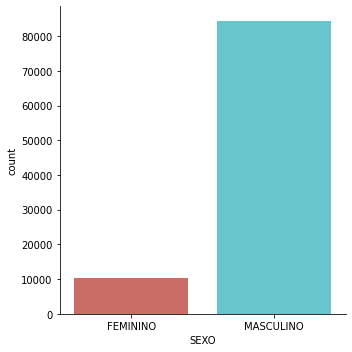

In [ ]:
sns.catplot(x="SEXO", kind="count", palette="hls", data=df)

### Qual a relação entre o contato com parentes e o tempo que estão em situação de rua?



*   46% das pessoas nunca veem seus parentes.
*   22% das pessoas quase nunca veem seus parentes.
*   14% das pessoas veem seus parentes todo mês.
*   9% das pessoas veem seus parentes toda semana.
*   5% das pessoas veem seus parentes todo ano.
*   4% das pessoas veem seus parentes todo dia.


In [ ]:
df['CONTATO_PARENTE_FORA_RUAS'].value_counts()

Nunca          43039
Quase nunca    21153
Todo mes       13638
Toda semana     8210
Todo ano        5162
Todo dia        3486
Name: CONTATO_PARENTE_FORA_RUAS, dtype: int64

* 42% das mulheres moradoras de rua nunca veem seus parentes
* 22% das mulheres moradoras de rua quase nunca veem seus parentes
* 16% das mulheres moradoras de rua veem seus parentes todo mês
* 11% das mulheres moradoras de rua veem seus parentes toda semana
* 5% das mulheres moradoras de rua veem seus parentes todo ano.
* 4% das mulheres moradoras de rua veem seus parentes todo dia.

In [ ]:
fem = df[df['SEXO'] == 'FEMININO']
fem['CONTATO_PARENTE_FORA_RUAS'].value_counts()

Nunca          4344
Quase nunca    2323
Todo mes       1613
Toda semana    1099
Todo ano        507
Todo dia        457
Name: CONTATO_PARENTE_FORA_RUAS, dtype: int64

* 46% dos homens moradores de rua nunca veem seus parentes.
* 22% dos homens moradores de rua quase nunca veem seus parentes.
* 14% dos homens moradores de rua veem seus parentes todo mês.
* 8% dos homens moradores de rua veem seus parentes toda semana.
* 6% dos homens moradores de rua veem seus parentes todo ano.
* 4% dos homens moradores de rua veem seus parentes todo dia.

In [ ]:
masc = df[df['SEXO'] == 'MASCULINO']
masc['CONTATO_PARENTE_FORA_RUAS'].value_counts()

Nunca          38695
Quase nunca    18830
Todo mes       12025
Toda semana     7111
Todo ano        4655
Todo dia        3029
Name: CONTATO_PARENTE_FORA_RUAS, dtype: int64

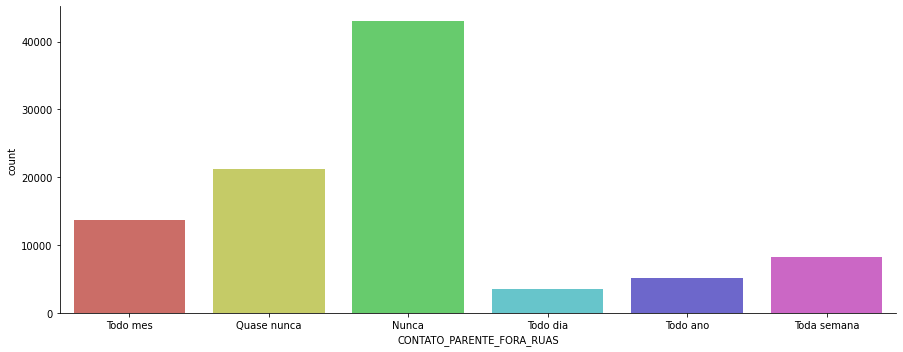

In [ ]:
g = sns.catplot(x="CONTATO_PARENTE_FORA_RUAS", kind="count", palette="hls", data=df)
g.fig.set_size_inches(15,5)

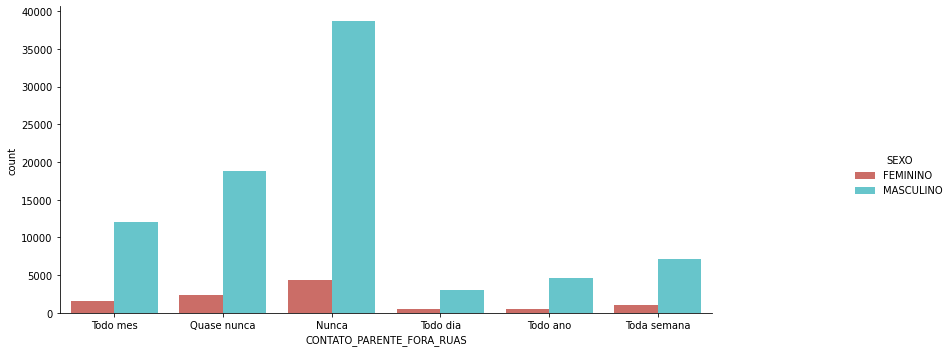

In [ ]:
g = sns.catplot(x="CONTATO_PARENTE_FORA_RUAS", kind="count", hue="SEXO", palette="hls", data=df)
g.fig.set_size_inches(15,5)

### Qual a distribuição de idade de homens moradores de rua em Belo Horizonte?

A maioria dos homens tem entre 35 e 51 anos.

In [ ]:
masc['IDADE'].value_counts()

40    3054
41    2956
39    2914
42    2899
43    2861
      ... 
80      22
77      19
16      11
15       4
82       3
Name: IDADE, Length: 68, dtype: int64

In [ ]:
masc['IDADE'].describe()

count    84345.000000
mean        43.192377
std         11.535021
min         15.000000
25%         35.000000
50%         42.000000
75%         51.000000
max         84.000000
Name: IDADE, dtype: float64

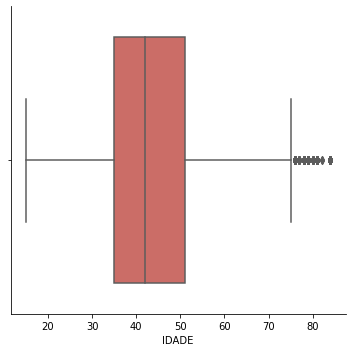

In [ ]:
sns.catplot(x="IDADE", kind="box", palette="hls" ,data=masc)

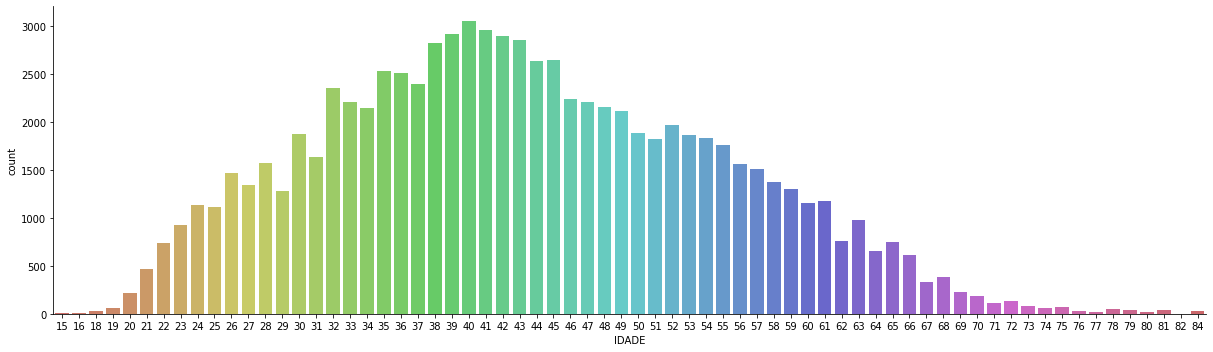

In [ ]:
g = sns.catplot(x="IDADE", kind="count", palette="hls", data=masc)
g.fig.set_size_inches(20,5)

### Qual a distribuição de idade de mulheres moradores de rua em Belo Horizonte?

Observou-se que a maioria das mulheres tem entre 33 e 49 anos de idade.

In [ ]:
fem['IDADE'].value_counts()

40    444
41    413
46    408
50    401
38    400
42    367
39    345
45    322
35    308
48    302
31    289
44    278
25    274
34    250
52    231
36    230
51    230
33    228
55    227
49    225
43    225
47    224
37    217
53    217
21    216
26    209
27    200
30    195
56    192
32    181
29    161
28    159
23    158
24    157
22    156
57    144
54    127
58    107
59    106
20    104
61     87
60     80
66     76
19     61
64     61
65     61
62     56
63     50
68     43
67     30
70     22
69     19
72     13
73     11
81     11
75     11
15     11
18      9
17      4
Name: IDADE, dtype: int64

In [ ]:
fem['IDADE'].describe()

count    10343.000000
mean        41.226820
std         11.650331
min         15.000000
25%         33.000000
50%         41.000000
75%         50.000000
max         81.000000
Name: IDADE, dtype: float64

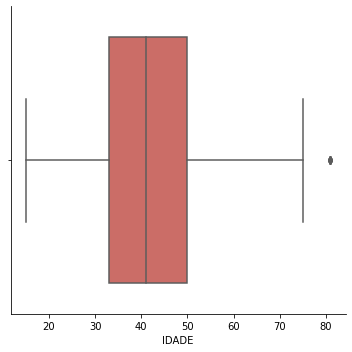

In [ ]:
sns.catplot(x="IDADE", kind="box", palette="hls" ,data=fem)

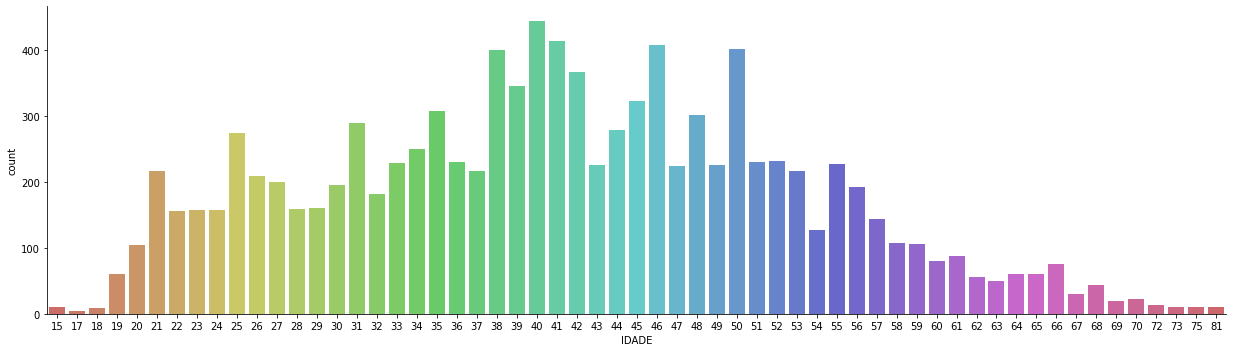

In [ ]:
g = sns.catplot(x="IDADE", kind="count", palette="hls", data=fem)
g.fig.set_size_inches(20,5)

## BOLSA FAMILIA

**Separando por mês:**

In [ ]:
#Leitura individual de cada um
df920 = pd.DataFrame(data9_20[u'BOLSA_FAMILIA'].value_counts())
df1020 = pd.DataFrame(data10_20[u'BOLSA_FAMILIA'].value_counts())
df1120 = pd.DataFrame(data11_20[u'BOLSA_FAMILIA'].value_counts())
df1220 = pd.DataFrame(data12_20[u'BOLSA_FAMILIA'].value_counts())
df121 = pd.DataFrame(data1_21[u'BOLSA_FAMILIA'].value_counts())
df221 = pd.DataFrame(data2_21[u'BOLSA_FAMILIA'].value_counts())
df321 = pd.DataFrame(data3_21[u'BOLSA_FAMILIA'].value_counts())
df421 = pd.DataFrame(data4_21[u'BOLSA_FAMILIA'].value_counts())
df521 = pd.DataFrame(data5_21[u'BOLSA_FAMILIA'].value_counts())
df621 = pd.DataFrame(data6_21[u'BOLSA_FAMILIA'].value_counts())
df721 = pd.DataFrame(data7_21[u'BOLSA_FAMILIA'].value_counts())

In [ ]:
df920.rename(columns={'BOLSA_FAMILIA': '09/20'}, inplace = True)
df1020.rename(columns={'BOLSA_FAMILIA': '10/20'}, inplace = True)
df1120.rename(columns={'BOLSA_FAMILIA': '11/20'}, inplace = True)
df1220.rename(columns={'BOLSA_FAMILIA': '12/20'}, inplace = True)
df121.rename(columns={'BOLSA_FAMILIA': '1/21'}, inplace = True)
df221.rename(columns={'BOLSA_FAMILIA': '2/21'}, inplace = True)
df321.rename(columns={'BOLSA_FAMILIA': '3/21'}, inplace = True)
df421.rename(columns={'BOLSA_FAMILIA': '4/21'}, inplace = True)
df521.rename(columns={'BOLSA_FAMILIA': '5/21'}, inplace = True)
df621.rename(columns={'BOLSA_FAMILIA': '6/21'}, inplace = True)
df721.rename(columns={'BOLSA_FAMILIA': '7/21'}, inplace = True)

In [ ]:
dfBolsa = df920.join([df1020,df1120,df1220,
                      df121,df221,df321,df421,df521,df621,df721])
dfBolsa

,09/20,10/20,11/20,12/20,1/21,2/21,3/21,4/21,5/21,6/21,7/21
SIM,6880,6744,6826,6823,6913,7217,7217,7293,6746,6728,6559
NAO,2096,2222,1676,1754,1706,1540,1540,1608,1536,1646,1913


<Figure size 7200x7200 with 0 Axes>

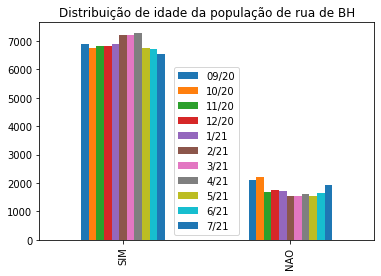

In [ ]:
fig = plt.figure(figsize=(100,100))
fig = dfBolsa.plot.bar()
fig.set_title('Distribuição de idade da população de rua de BH')
plt.show()

APONTAMENTOS:
  * Observa-se que o benefício é essencial para estes moradores, com mais que 70% de cobertura.
  *Para a confirmação de recursos enviados pelo governo para manutenção deste programa, foi consultado o dataframe "beneficios.csv", presente no repositório deste trabalho.

##GRAU DE INSTRUÇÃO

O Fundamental incompleto é predominande, indicando a necessidade de intervenção também a nível educacional.

In [ ]:
df['GRAU_INSTRUCAO'].value_counts()

Fundamental incompleto         49858
Fundamental completo           13677
Medio completo                 13631
Medio incompleto                9430
Sem instrucao                   6857
Superior incompleto ou mais     1116
Nao Informado                    119
Name: GRAU_INSTRUCAO, dtype: int64

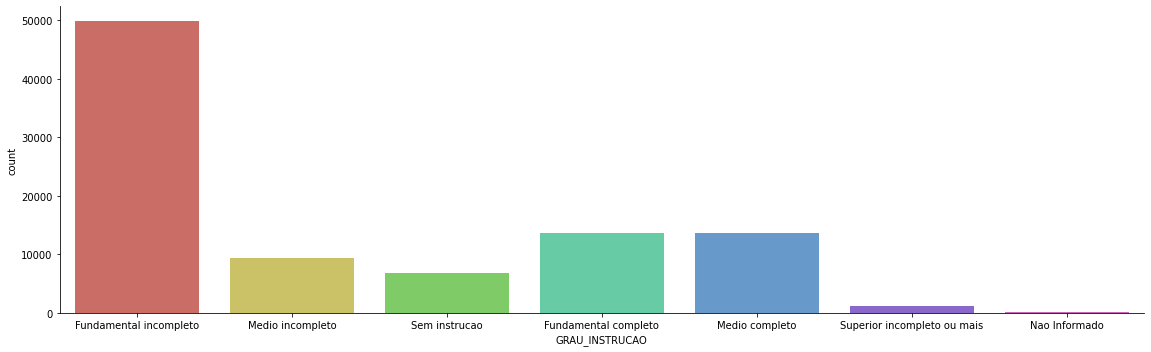

In [ ]:
g = sns.catplot(x="GRAU_INSTRUCAO", kind="count", palette="hls", data=df)
g.fig.set_size_inches(20,5)


##Tempo em que os moradores vivem na rua?

In [ ]:
df.columns

Index(['TEMPO_VIVE_NA_RUA', 'CONTATO_PARENTE_FORA_RUAS', 'DATA_NASCIMENTO',
       'IDADE', 'SEXO', 'BOLSA_FAMILIA', 'POP_RUA', 'GRAU_INSTRUCAO',
       'COR_RACA', 'VAL_REMUNERACAO_MES_PASSADO', 'CRAS', 'REGIONAL',
       'FAIXA_DESATUALICACAO_CADASTRAL', 'MES_ANO_REFERENCIA'],
      dtype='object')

In [ ]:
df['TEMPO_VIVE_NA_RUA'].value_counts()

Ate seis meses               29485
Entre dois e cinco anos      17725
Entre seis meses e um ano    12528
Mais de dez anos             12429
Entre um e dois anos         11391
Entre cinco e dez anos       11130
Name: TEMPO_VIVE_NA_RUA, dtype: int64

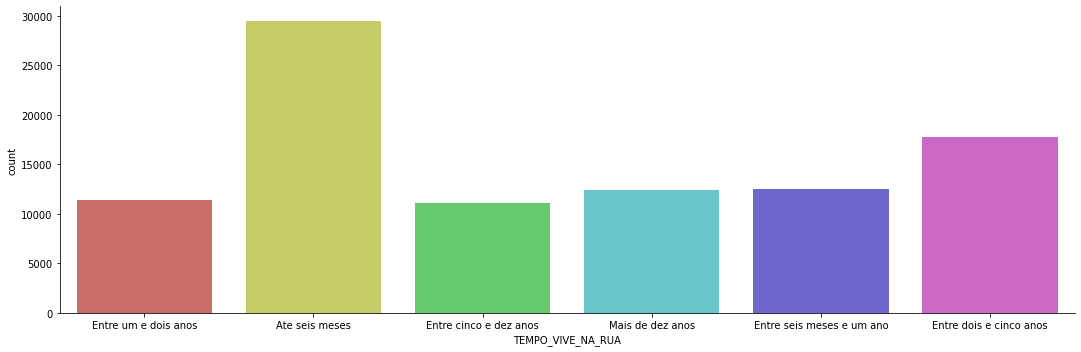

In [ ]:
g = sns.catplot(x="TEMPO_VIVE_NA_RUA", kind="count", palette="hls", data=df)
g.fig.set_size_inches(20,5)


##Qual o percentual de moradores de rua em cada regional de Belo Horizonte?

In [ ]:
df['REGIONAL'].value_counts()

CENTRO SUL                       54182
LESTE                            11232
NORTE                             8110
NOROESTE                          7702
VENDA NOVA                        3176
BARREIRO                          2809
OESTE                             2803
NORDESTE                          2284
PAMPULHA                          1914
ENDERECO NAO GEORREFERENCIADO      476
Name: REGIONAL, dtype: int64

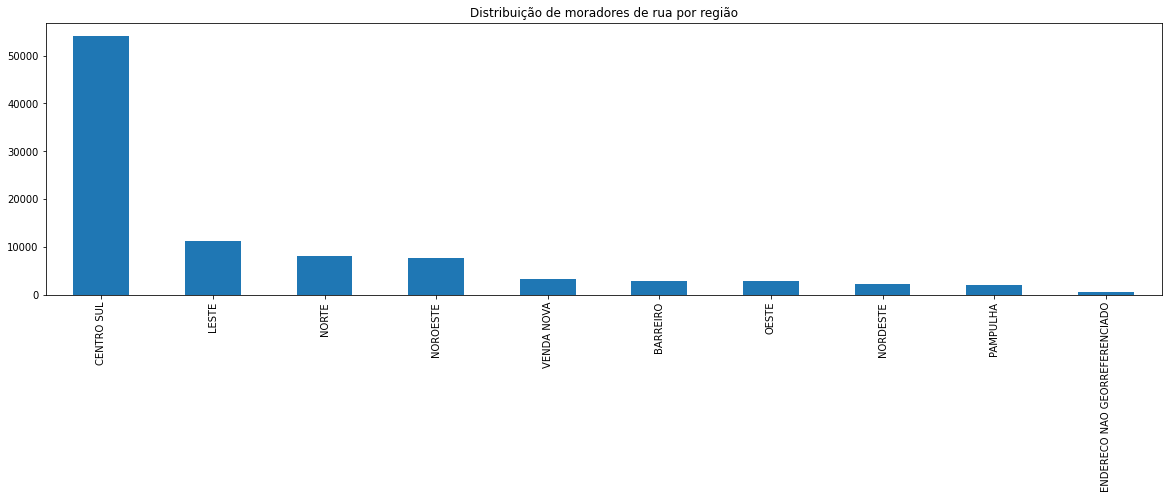

In [ ]:
fig = plt.figure(figsize=(20,5))
fig = df['REGIONAL'].value_counts().plot.bar()
fig.set_title('Distribuição de moradores de rua por região')
plt.show()

##Quais são a raça e o sexo predominante de cada regional presente no banco de dados?

Com base nos dados obtidos nas regionais o sexo predominante foi o **masculino** e a raça predominante foi **parda**, como verificado abaixo:

In [ ]:
group_regional = df.groupby('REGIONAL')
group_centroSul = group_regional.get_group('CENTRO SUL')
group_leste = group_regional.get_group('LESTE')
group_norte = group_regional.get_group('NORTE')
group_noroeste = group_regional.get_group('NOROESTE')
group_vendaNova = group_regional.get_group('VENDA NOVA')
group_oeste = group_regional.get_group('OESTE')
group_barreiro = group_regional.get_group('BARREIRO')
group_nordeste = group_regional.get_group('NORDESTE')
group_pampulha = group_regional.get_group('PAMPULHA')

In [ ]:
group_centroSul['SEXO'].value_counts()

MASCULINO    49285
FEMININO      4897
Name: SEXO, dtype: int64

In [ ]:
group_centroSul['COR_RACA'].value_counts()

Parda            32208
Preta            12572
Branca            9007
Amarela            257
Indigena            71
Nao Informado       67
Name: COR_RACA, dtype: int64

In [ ]:
group_leste['SEXO'].value_counts()

MASCULINO    10182
FEMININO      1050
Name: SEXO, dtype: int64

In [ ]:
group_leste['COR_RACA'].value_counts()

Parda            6842
Preta            2639
Branca           1680
Amarela            41
Indigena           19
Nao Informado      11
Name: COR_RACA, dtype: int64

In [ ]:
group_norte['SEXO'].value_counts()

MASCULINO    6820
FEMININO     1290
Name: SEXO, dtype: int64

In [ ]:
group_norte['COR_RACA'].value_counts()

Parda            4893
Preta            1985
Branca           1200
Amarela            21
Nao Informado      11
Name: COR_RACA, dtype: int64

In [ ]:
group_noroeste['SEXO'].value_counts()

MASCULINO    6621
FEMININO     1081
Name: SEXO, dtype: int64

In [ ]:
group_noroeste['COR_RACA'].value_counts()

Parda       4757
Preta       1811
Branca      1099
Amarela       30
Indigena       5
Name: COR_RACA, dtype: int64

In [ ]:
group_vendaNova['SEXO'].value_counts()

MASCULINO    2726
FEMININO      450
Name: SEXO, dtype: int64

In [ ]:
group_vendaNova['COR_RACA'].value_counts()

Parda            1966
Preta             716
Branca            464
Amarela            26
Nao Informado       4
Name: COR_RACA, dtype: int64

In [ ]:
group_oeste['SEXO'].value_counts()

MASCULINO    2429
FEMININO      374
Name: SEXO, dtype: int64

In [ ]:
group_oeste['COR_RACA'].value_counts()

Parda      1846
Preta       489
Branca      460
Amarela       8
Name: COR_RACA, dtype: int64

In [ ]:
group_barreiro['SEXO'].value_counts()

MASCULINO    2454
FEMININO      355
Name: SEXO, dtype: int64

In [ ]:
group_barreiro['COR_RACA'].value_counts()

Parda            1844
Preta             618
Branca            314
Amarela            22
Nao Informado      11
Name: COR_RACA, dtype: int64

In [ ]:
group_nordeste['SEXO'].value_counts()

MASCULINO    1898
FEMININO      386
Name: SEXO, dtype: int64

In [ ]:
group_nordeste['COR_RACA'].value_counts()

Parda            1314
Preta             621
Branca            327
Nao Informado      11
Amarela             7
Indigena            4
Name: COR_RACA, dtype: int64

In [ ]:
group_pampulha['SEXO'].value_counts()

MASCULINO    1564
FEMININO      350
Name: SEXO, dtype: int64

In [ ]:
group_pampulha['COR_RACA'].value_counts()

Parda     1220
Preta      417
Branca     277
Name: COR_RACA, dtype: int64

##Qual o percentual de moradores de rua cadastrados em um Cras?

In [ ]:
df['CRAS'].value_counts()

ENDERECO FORA AREA CRAS                               58434
ENDERECO FORA DE AREA CRAS                            22139
CRAS PROVIDENCIA                                       5712
CRAS VILA SENHOR DOS PASSOS                            3305
CRAS VILA BIQUINHAS                                    1873
ENDERECO NAO GEORREFERENCIADO                           476
CRAS GRANJA DE FREITAS                                  257
CRAS MANTIQUEIRA                                        242
CRAS PETROPOLIS                                         167
CRAS VILA SAO JOSE                                      128
CRAS ZILAH SPOSITO                                      117
CRAS VILA SANTA RITA DE CASSIA                          115
CRAS NOVO AARAO REIS   BRASILINA MARIA DE OLIVEIRA      110
CRAS VILA MARCOLA                                       108
CRAS VILA MARIA                                         102
CRAS PEDREIRA PRADO LOPES                               100
CRAS TAQUARIL                           

In [ ]:
total = df['CRAS'].value_counts().sum()
fora_CRAS = 58521 + 22179
fora_CRAS
dentro_CRAS = total - fora_CRAS
percentual = (dentro_CRAS*100)/total
print("O percentual de moradores de rua que estão cadastrados em um CRAS é: ", percentual,"%")

O percentual de moradores de rua que estão cadastrados em um CRAS é:  14.772727272727273 %


##A cobertura do CRAS aumentou ou diminuiu desde o início da pesquisa?(09/2020 a 07/2021)


In [ ]:
df['MES_ANO_REFERENCIA'].value_counts()

2021-01-02    17424
2020-01-09     8923
2020-01-10     8913
2021-01-04     8858
2021-01-01     8572
2020-01-12     8524
2020-01-11     8450
2021-01-07     8436
2021-01-06     8340
2021-01-05     8248
Name: MES_ANO_REFERENCIA, dtype: int64

Aqui foram retirados endereços que não nos ajudam nessa analise, como os valores marcados com 'ENDERECO FORA AREA CRAS', 'ENDERECO FORA DE AREA CRAS', 'ENDERECO NAO GEORREFERENCIADO'

In [ ]:
df2 = df
df2 = df2.drop(df2[(df2['CRAS'] == 'ENDERECO FORA AREA CRAS') | (df2['CRAS'] == 'ENDERECO FORA DE AREA CRAS ') | (df2['CRAS'] == 'ENDERECO NAO GEORREFERENCIADO')].index)
df2

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA
0,Entre um e dois anos,Todo mes,07/06/1958,63,FEMININO,SIM,SIM,Fundamental incompleto,Preta,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09
1,Ate seis meses,Quase nunca,04/06/1986,35,MASCULINO,NAO,SIM,Medio incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,2020-01-09
2,Entre cinco e dez anos,Nunca,03/10/1963,58,FEMININO,SIM,SIM,Fundamental incompleto,Parda,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,2020-01-09
3,Ate seis meses,Todo dia,03/04/1958,63,FEMININO,NAO,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09
4,Entre cinco e dez anos,Todo ano,11/08/1960,61,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,2020-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95073,Entre dois e cinco anos,Quase nunca,12/12/1997,23,MASCULINO,SIM,SIM,Medio completo,Preta,0.0,CRAS PROVIDENCIA,NORTE,ate 12 Meses,2021-01-07
95078,Entre dois e cinco anos,Nunca,21/01/1986,35,MASCULINO,SIM,SIM,Medio incompleto,Preta,0.0,CRAS MANTIQUEIRA,VENDA NOVA,ate 12 Meses,2021-01-07
95080,Entre um e dois anos,Quase nunca,25/11/1964,56,MASCULINO,SIM,SIM,Medio incompleto,Parda,0.0,CRAS INDEPENDENCIA,BARREIRO,ate 12 Meses,2021-01-07
95101,Entre dois e cinco anos,Toda semana,02/04/1973,48,MASCULINO,SIM,SIM,Fundamental incompleto,Preta,0.0,CRAS VILA BIQUINHAS,NORTE,ate 12 Meses,2021-01-07


In [ ]:
df2['CRAS'].value_counts()

ENDERECO FORA DE AREA CRAS                            22139
CRAS PROVIDENCIA                                       5712
CRAS VILA SENHOR DOS PASSOS                            3305
CRAS VILA BIQUINHAS                                    1873
CRAS GRANJA DE FREITAS                                  257
CRAS MANTIQUEIRA                                        242
CRAS PETROPOLIS                                         167
CRAS VILA SAO JOSE                                      128
CRAS ZILAH SPOSITO                                      117
CRAS VILA SANTA RITA DE CASSIA                          115
CRAS NOVO AARAO REIS   BRASILINA MARIA DE OLIVEIRA      110
CRAS VILA MARCOLA                                       108
CRAS VILA MARIA                                         102
CRAS PEDREIRA PRADO LOPES                               100
CRAS TAQUARIL                                            99
CRAS MORRO DAS PEDRAS   GRACA SABOIA                     98
CRAS ARTHUR DE SA   UNIAO               

#**4. Análise Preditiva**

## Tratamento dos dados - Previsão

*  Cabeçalho para consultas:




In [ ]:
data.head()

,TEMPO_VIVE_NA_RUA,CONTATO_PARENTE_FORA_RUAS,DATA_NASCIMENTO,IDADE,SEXO,BOLSA_FAMILIA,POP_RUA,GRAU_INSTRUCAO,COR_RACA,VAL_REMUNERACAO_MES_PASSADO,CRAS,REGIONAL,FAIXA_DESATUALICACAO_CADASTRAL,MES_ANO_REFERENCIA,TEMPO_DE_RUA
0,Entre um e dois anos,Todo mes,07/06/1958,63,FEMININO,SIM,SIM,Fundamental incompleto,Preta,60.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09,2
1,Ate seis meses,Quase nunca,04/06/1986,35,MASCULINO,NAO,SIM,Medio incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,NORDESTE,ate 12 Meses,2020-01-09,0
2,Entre cinco e dez anos,Nunca,03/10/1963,58,FEMININO,SIM,SIM,Fundamental incompleto,Parda,50.0,ENDERECO FORA DE AREA CRAS,OESTE,37 a 48 Meses,2020-01-09,4
3,Ate seis meses,Todo dia,03/04/1958,63,FEMININO,NAO,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,13 a 18 Meses,2020-01-09,0
4,Entre cinco e dez anos,Todo ano,11/08/1960,61,MASCULINO,SIM,SIM,Fundamental incompleto,Parda,0.0,ENDERECO FORA DE AREA CRAS,CENTRO SUL,ate 12 Meses,2020-01-09,4


In [ ]:
# Retirando o valor de remuneraçao do mes anterior (fora de formato)
data = data.drop(columns = ['VAL_REMUNERACAO_MES_PASSADO'])

A partir deste ponto, para facilitar o entendimento e vizualização dos dados. Agrupamos todos os os atributos qualitativos convertendo-os em inteiros para avaliar as correlações. Por isso, uma tabela de correspondências foi gerada.

In [ ]:
#tempo que vive na rua
data['TEMPO_VIVE_NA_RUA'].value_counts()

Ate seis meses               29485
Entre dois e cinco anos      17725
Entre seis meses e um ano    12528
Mais de dez anos             12429
Entre um e dois anos         11391
Entre cinco e dez anos       11130
Name: TEMPO_VIVE_NA_RUA, dtype: int64

In [ ]:
#tempo de rua
data['TEMPO_DE_RUA'] = data['TEMPO_VIVE_NA_RUA'].map({"Ate seis meses":0,"Entre seis meses e um ano":1,
                                                       'Entre um e dois anos':2, 'Entre dois e cinco anos':3,
                                                       'Entre cinco e dez anos':4, 'Mais de dez anos':5},na_action='ignore')


In [ ]:
#contato com parente fora das ruas
data['CONTATO_PARENTE'] = data['CONTATO_PARENTE_FORA_RUAS'].map({"Nunca":0,"Quase nunca":1,
                                                       'Todo ano':2, 'Todo mes':3,
                                                       'Toda semana':4, 'Todo dia':5},na_action='ignore')

In [ ]:
#Sexo
data['SEXO_MF'] = data['SEXO'].map({"MASCULINO":0,"FEMININO":1},na_action='ignore')

MASCULINO    84345
FEMININO     10343
Name: SEXO, dtype: int64

In [ ]:
#Bolsa familia
data['BOLSA'] = data['BOLSA_FAMILIA'].map({"SIM":1,"NAO":0},na_action='ignore')

In [ ]:
#Grau de instrução
data['G_INSTRUCAO'] = data['GRAU_INSTRUCAO'].map({"Nao Informado":0,"Sem instrucao":1,
                                                       'Fundamental incompleto':2, 'Fundamental completo':3,
                                                       'Medio incompleto':4, 'Medio completo':5,
                                              'Superior incompleto ou mais':6},na_action='ignore')

In [ ]:
#Cor e raça
data['COR_R'] = data['COR_RACA'].map({"Nao Informado":0,"Preta":1,'Branca':2, 'Amarela':3,
                                  'Parda':4, 'Indigena':5},na_action='ignore')

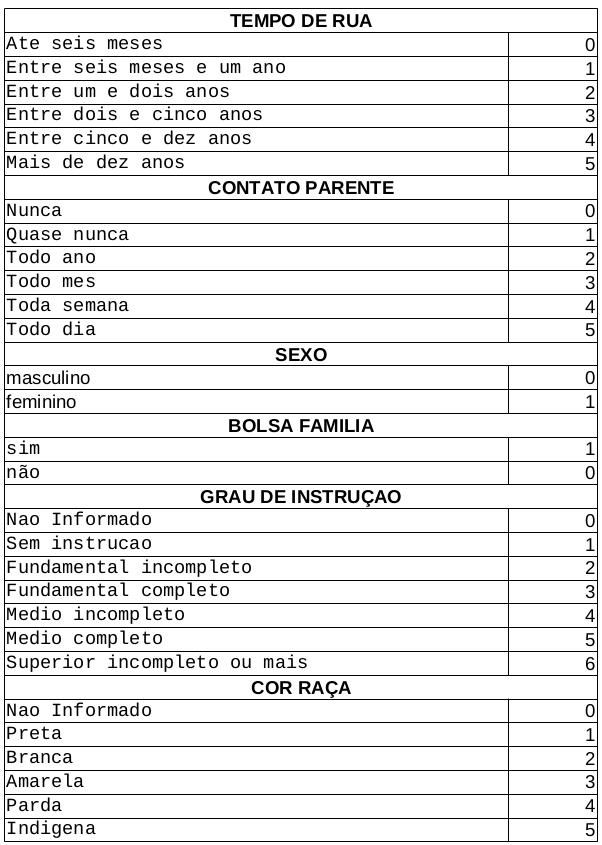

##Análise preditiva

###**Verificando as correlações entre os dados apresentados:**

Para uma análise mais detalhada, criamos um heatmap dos dados do frame:

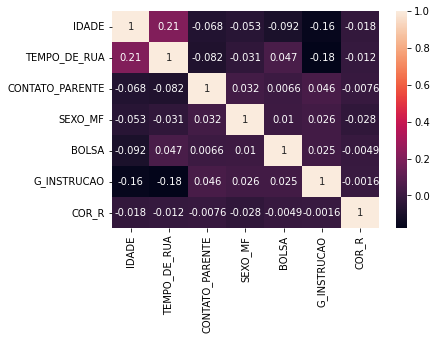

In [ ]:
sns.heatmap(data.corr(),annot = True)

Agora vendo a imagem e os coeficientes percebemos que há bem poucas correlações fortes no dataset, essa informação é útil pois indica que não teremos bons modelos preditivos.

In [ ]:
df_pred = data[{'IDADE','G_INSTRUCAO','BOLSA','SEXO_MF','CONTATO_PARENTE','COR_R','TEMPO_DE_RUA'}]
df_pred.keys()

Index(['TEMPO_DE_RUA', 'CONTATO_PARENTE', 'G_INSTRUCAO', 'SEXO_MF', 'BOLSA',
       'COR_R', 'IDADE'],
      dtype='object')

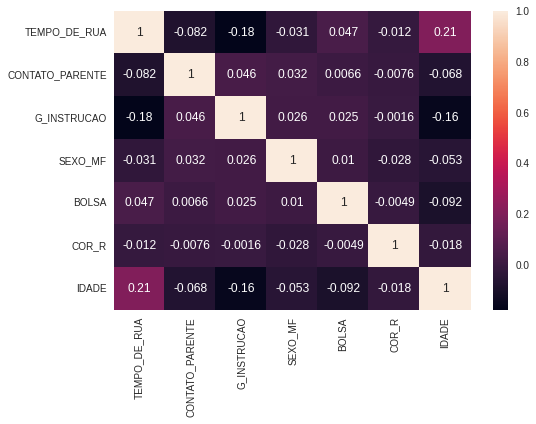

In [ ]:
sns.heatmap(df_pred.corr(),annot = True)

**Avaliando as correlações utilizando Spearman:**

In [ ]:
corr = df_pred.corr('spearman')
corr = corr[['IDADE']].sort_values(by = ['IDADE'],ascending = False)
corr

,IDADE
IDADE,1.000000
TEMPO_DE_RUA,0.213082
COR_R,-0.017700
SEXO_MF,-0.046458
CONTATO_PARENTE,-0.057905
BOLSA,-0.068836
G_INSTRUCAO,-0.189860


In [ ]:
corr = df_pred.corr('spearman')
corr = corr[['SEXO_MF']].sort_values(by = ['SEXO_MF'],ascending = False)
corr

,SEXO_MF
SEXO_MF,1.000000
CONTATO_PARENTE,0.030530
G_INSTRUCAO,0.019202
BOLSA,0.010488
COR_R,-0.027777
TEMPO_DE_RUA,-0.030003
IDADE,-0.046458


In [ ]:
corr = df_pred.corr('spearman')
corr = corr[['TEMPO_DE_RUA']].sort_values(by = ['TEMPO_DE_RUA'],ascending = False)
corr


,TEMPO_DE_RUA
TEMPO_DE_RUA,1.000000
IDADE,0.213082
BOLSA,0.049327
COR_R,-0.011494
SEXO_MF,-0.030003
CONTATO_PARENTE,-0.066580
G_INSTRUCAO,-0.177187


In [ ]:
corr = df_pred.corr('spearman')
corr = corr[['COR_R']].sort_values(by = ['COR_R'],ascending = False)
corr

,COR_R
COR_R,1.000000
G_INSTRUCAO,0.002466
BOLSA,-0.005081
CONTATO_PARENTE,-0.006113
TEMPO_DE_RUA,-0.011494
IDADE,-0.017700
SEXO_MF,-0.027777


Assim como indicado pelos heatmaps, as correlações encontradas não foram satisfatórias.

###**Predição**

In [ ]:
#IMPORTS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_pred.head()

,TEMPO_DE_RUA,CONTATO_PARENTE,G_INSTRUCAO,SEXO_MF,BOLSA,COR_R,IDADE
0,2,3,2,1,1,1,63
1,0,1,4,0,0,4,35
2,4,0,2,1,1,4,58
3,0,5,2,1,0,4,63
4,4,2,2,0,1,4,61


In [ ]:
X = df_pred.drop(columns=['TEMPO_DE_RUA'])
y = df_pred['TEMPO_DE_RUA']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
p = model.predict(X_test)

In [ ]:
accuracy_score(y_test, p)

0.5731861865033266

Ao tentar prever o Tempo que um morador está na rua utilizando todos os atributos do dataframe encontramos uma acurácia de 0.57 o que nos diz que esse não é o melhor target que podemos utilizar

In [ ]:
X = df_pred.drop(columns=['COR_R'])
y = df_pred['COR_R']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
p = model.predict(X_test)
accuracy_score(y_test, p)

0.7750026401943183

In [ ]:
#Criar subconjunto para IDADE
X = df_pred.drop(columns=["IDADE"])
y = df_pred["IDADE"]
X_treino, X_teste,y_treino,  y_teste = train_test_split(X,y, test_size = 0.1)

In [ ]:
#Criar modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
previsao = modelo.predict(X_teste)
accuracy_score(y_teste,previsao)

0.16284718555285668

A tentativa de prever a idade dos moradores de rua foi a que teve pior acurácia entre nosssos testes com valor de 0.1687

In [ ]:
# [bolsa, idade, tempo de rua, contato com parente, sexo, cor, grau de instrução]
#prever a idade de uma pessoa que
previsao = modelo.predict([[1,2,3,1,1,2]])
previsao

array([40])

A idade provavel de um homem com as caracteristicas {1,2,3,1,1,2} foi 40 anos.

In [ ]:
#Criar subconjunto para COR/RACA
X = df_pred.drop(columns=["COR_R"])
y = df_pred["COR_R"]
X_treino, X_teste,y_treino,  y_teste = train_test_split(X,y, test_size = 0.1)

In [ ]:
#Criar modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino,y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# [bolsa, idade, tempo de rua, contato com parente, sexo, cor, grau de instrução]
#prever a idade de uma pessoa que
previsao = modelo.predict([[1,60,3,1,1,2]])
previsao

array([4])

A Cor provável de um homem com as caracteristicas {1,2,3,1,1,2} é Parda. Aqui  fica claro que o modelo erra, uma vez que a cor do homem com tais caracteristicas presente no teste é preta.

In [ ]:
classes = [0,1,2,3,4,5]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.7694582321258845

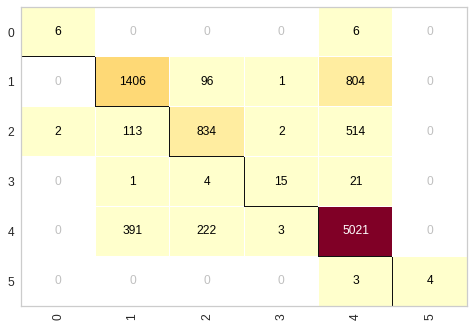

In [ ]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo,classes = classes)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

Utilizando a matriz de confusão conseguimos ver que apesar do modelo utilizado para tentar prever a Cor/raça de um morador de rua ter **0.7750026401943183** de acurácia fica claro que essa previsão não pode ser confiável. Isso ocorre porque os dados estão enviasados considerando que a maior parte dos entrevistados se declarou como parda(4) o modelo irá prever esse valor mesmo que não seja o caso (e quase sempre ele irá acertar)

#**Conclusão**

Após todas as etapas deste trabalho terem sido realizadas, um sentimento é de que a quantidade e a qualidade dos dados foi insuficiente para que chegassemos a um resultado satisfatório fica claro que é muito importante melhorar as métricas de coleta de dados. A linha de tempo dos dados colhidos vai de setembro de 2020 a julho de 2021, ou seja, não cobrimos nem mesmo 12 meses no total. Esse fato, mesmo que não em um periodo tão volátil, também implicaria em insuficiência de dados para tomadas de decisão.

Esperavamos que a análise preditiva fosse capaz de realizar e apontar indicativos que ajudassem a solucionar problemas, contudo a baixa correlação dos dados com a baixa acurácia de outras predições não permitiu. A única que foi eficiente deu-se pelo enviesamento dos dados que implicava em um algoritmo "viciado" em prever a cor parda.

Do ponto de vista de aprendizado e crescimento este trabalho foi de grande relevância e deixa uma brecha para análises futuras e de melhor qualidade, com ajustes de perguntas e dados tratados de maneira mais eficaz, cobrindo um tempo cronológico maior.